# <center> EDA OF STORE SALES ,USA

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('Store Sales.csv', parse_dates= ['Ship Date', 'Order Date'])
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


###### To check data types

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

###### To find average of null values

In [4]:
data.isnull().mean()*100 

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

##### Checking for duplicated values

In [5]:
data.duplicated().sum()

0

##### Dropping unwanted columns

In [6]:
data.drop(columns =['Row ID', 'Order ID','Postal Code','Product ID','Customer Name', 'Country','City','Product Name'], inplace= True)
#Dropping values which are not necessary

In [7]:
data.head(5)

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,State,Region,Category,Sub-Category,Sales
0,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,Kentucky,South,Furniture,Bookcases,261.9600
1,2017-08-11,2017-11-11,Second Class,CG-12520,Consumer,Kentucky,South,Furniture,Chairs,731.9400
2,2017-12-06,2017-06-16,Second Class,DV-13045,Corporate,California,West,Office Supplies,Labels,14.6200
3,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,Florida,South,Furniture,Tables,957.5775
4,2016-11-10,2016-10-18,Standard Class,SO-20335,Consumer,Florida,South,Office Supplies,Storage,22.3680


In [8]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment',
       'State', 'Region', 'Category', 'Sub-Category', 'Sales'],
      dtype='object')

##### Renaming the columns

In [9]:
data.rename(columns = {'Order Date':'OrderDate', 'Ship Date': 'ShipDate','Ship Mode':'ShipMode',\
                       'Customer ID':'CustomerID','Sub-Category':'SubCategory', \
                       'Product Name':'ProductName' }, inplace = True)

##### Sorting based on order date and resetting Index 

In [10]:
data.sort_values(by = ['OrderDate'], ascending=True , inplace= True)
data.reset_index (drop = True , inplace= True)
data.sample()


,OrderDate,ShipDate,ShipMode,CustomerID,Segment,State,Region,Category,SubCategory,Sales
8495,2018-09-07,2018-07-15,Standard Class,TD-20995,Consumer,Oregon,West,Office Supplies,Binders,1.08


##### Feature engineering column for adding order year , month and weekdays

In [11]:
data['OrderYear'] = data.OrderDate.dt.year
data['WeekDay'] = data.OrderDate.dt.weekday
data['Month'] = data.OrderDate.dt.month
data.sample(10)

,OrderDate,ShipDate,ShipMode,CustomerID,Segment,State,Region,Category,SubCategory,Sales,OrderYear,WeekDay,Month
7446,2018-04-23,2018-04-26,First Class,GG-14650,Corporate,Ohio,East,Office Supplies,Binders,11.760,2018,0,4
9765,2018-12-28,2018-12-31,First Class,JG-15310,Corporate,California,West,Furniture,Chairs,340.704,2018,4,12
2018,2016-01-13,2016-01-17,Standard Class,PB-19150,Consumer,California,West,Furniture,Furnishings,77.600,2016,2,1
4802,2017-05-18,2017-05-24,Standard Class,EB-13930,Consumer,California,West,Office Supplies,Storage,104.280,2017,3,5
9579,2018-12-13,2018-12-13,Same Day,MW-18220,Consumer,Washington,West,Office Supplies,Storage,31.440,2018,3,12
1840,2015-12-20,2015-12-21,First Class,PS-19045,Home Office,Virginia,South,Furniture,Tables,455.100,2015,6,12
8151,2018-07-23,2018-07-26,First Class,TB-21520,Consumer,California,West,Office Supplies,Binders,15.192,2018,0,7
5331,2017-08-04,2017-12-04,Standard Class,LC-17140,Consumer,California,West,Office Supplies,Paper,20.040,2017,4,8
2842,2016-07-16,2016-07-16,Same Day,EM-13810,Corporate,California,West,Furniture,Chairs,1348.704,2016,5,7
5072,2017-06-26,2017-06-26,Same Day,AH-10075,Corporate,California,West,Office Supplies,Paper,12.480,2017,0,6


In [12]:
data.WeekDay = data.WeekDay.replace({0:'Sunday', 1:'Monday', 2:'Tuesday',\
                                        3:'Wednesday' , 4:'Thursday', 5:'Friday', 6:'Saturday'})
data.Month = data.Month.replace({1:'January' , 2:'February', 3:'March',4:'April', 5: 'May', 6:'June',\
                                7:'July', 8:'August', 9:'Spetember', 10:'October', 11:'November', 12:'December'})
data.head()

,OrderDate,ShipDate,ShipMode,CustomerID,Segment,State,Region,Category,SubCategory,Sales,OrderYear,WeekDay,Month
0,2015-01-02,2015-03-02,First Class,BD-11500,Consumer,Wisconsin,Central,Technology,Accessories,468.900,2015,Thursday,January
1,2015-01-03,2015-05-03,Standard Class,HR-14770,Home Office,New York,East,Technology,Phones,5.940,2015,Friday,January
2,2015-01-03,2015-06-03,Second Class,DB-13060,Consumer,Washington,West,Furniture,Chairs,457.568,2015,Friday,January
3,2015-01-03,2015-05-03,Standard Class,VF-21715,Home Office,Illinois,Central,Office Supplies,Paper,17.472,2015,Friday,January
4,2015-01-03,2015-05-03,Standard Class,SC-20380,Consumer,Texas,Central,Furniture,Furnishings,63.552,2015,Friday,January


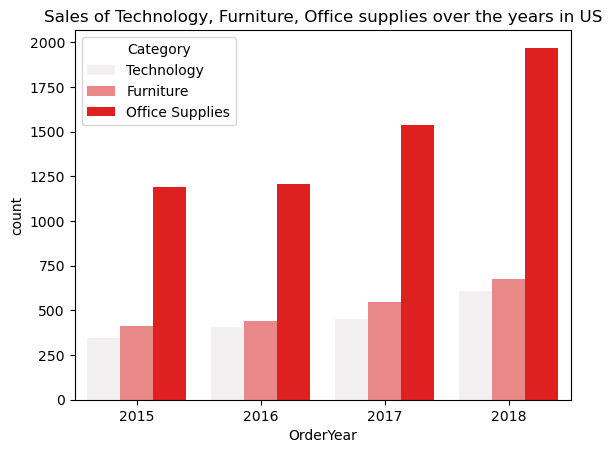

In [13]:
plt.title('Sales of Technology, Furniture, Office supplies over the years in US')
sns.countplot(data = data, x = 'OrderYear' , color = 'red' , hue = 'Category')
plt.show()

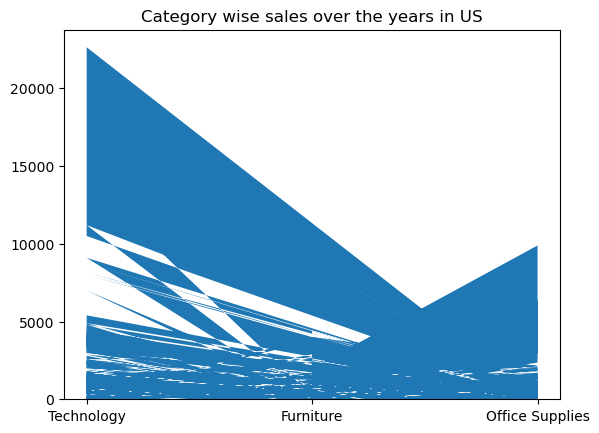

In [14]:
plt.title('Category wise sales over the years in US')
plt.stackplot(data.Category, data.Sales)
plt.show()

###### Demand of Technology, Furniture and Office suplies increased over the years

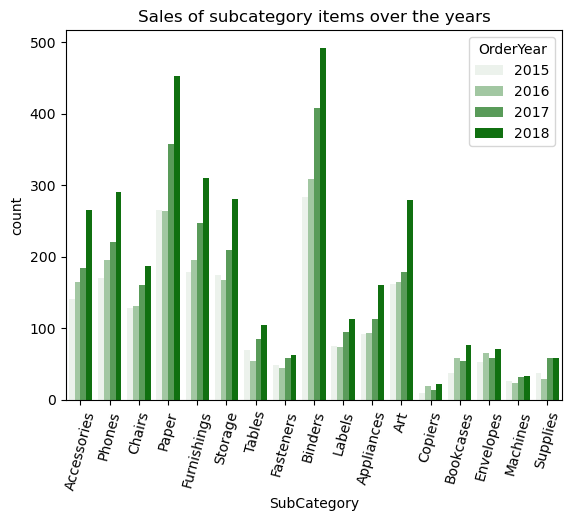

In [15]:
sns.countplot( data = data,  x= 'SubCategory' , color = 'green', hue = 'OrderYear')
plt.title('Sales of subcategory items over the years')
plt.xticks(rotation =75)
plt.show()


##### <center>  Binders were sold most and Copiers were sold least in the Year 2018


##### Feature engineering for Shipment Delay

In [16]:
data['ShipmentDelay'] = data.ShipDate-data.OrderDate
data.sample(10)

,OrderDate,ShipDate,ShipMode,CustomerID,Segment,State,Region,Category,SubCategory,Sales,OrderYear,WeekDay,Month,ShipmentDelay
1932,2015-12-30,2016-04-01,Standard Class,AJ-10960,Consumer,New York,East,Office Supplies,Appliances,122.940,2015,Tuesday,December,93 days
717,2015-06-20,2015-06-24,Standard Class,SC-20020,Consumer,Texas,Central,Technology,Machines,418.800,2015,Friday,June,4 days
4486,2017-04-04,2017-09-04,Standard Class,EH-14185,Consumer,New York,East,Office Supplies,Binders,588.784,2017,Monday,April,153 days
8585,2018-09-14,2018-09-15,First Class,PS-18760,Consumer,Pennsylvania,East,Office Supplies,Binders,18.312,2018,Thursday,Spetember,1 days
5849,2017-10-12,2017-12-13,First Class,DL-13315,Consumer,New York,East,Office Supplies,Envelopes,361.920,2017,Wednesday,October,62 days
2894,2016-07-31,2016-06-08,Standard Class,SC-20695,Corporate,Missouri,Central,Office Supplies,Supplies,52.590,2016,Saturday,July,-53 days
6049,2017-11-11,2017-11-16,Standard Class,EB-13750,Corporate,New York,East,Office Supplies,Binders,35.232,2017,Friday,November,5 days
6519,2017-12-29,2018-02-01,Standard Class,CD-11920,Consumer,Kansas,Central,Furniture,Furnishings,70.560,2017,Thursday,December,34 days
1957,2016-01-03,2016-03-03,Second Class,DH-13075,Corporate,California,West,Technology,Phones,15.984,2016,Saturday,January,60 days
1617,2015-11-21,2015-11-26,Standard Class,SC-20680,Home Office,California,West,Technology,Accessories,94.990,2015,Friday,November,5 days


In [17]:
data.ShipmentDelay.unique

<bound method Series.unique of 0       59 days
1      120 days
2      151 days
3      120 days
4      120 days
         ...   
9795    61 days
9796   122 days
9797    61 days
9798    61 days
9799    61 days
Name: ShipmentDelay, Length: 9800, dtype: timedelta64[ns]>

In [18]:
data.ShipmentDelay = data.ShipmentDelay.astype('str')
data.ShipmentDelay = data.ShipmentDelay.str.replace("\D", " " , regex = True)
data.ShipmentDelay = data.ShipmentDelay.astype(int)
data.ShipmentDelay

0        59
1       120
2       151
3       120
4       120
       ... 
9795     61
9796    122
9797     61
9798     61
9799     61
Name: ShipmentDelay, Length: 9800, dtype: int32

In [19]:
data_2018_sales =data.query("OrderYear == 2018  ")
data_2018_sales

,OrderDate,ShipDate,ShipMode,CustomerID,Segment,State,Region,Category,SubCategory,Sales,OrderYear,WeekDay,Month,ShipmentDelay
6542,2018-01-01,2018-05-01,Standard Class,JM-15250,Consumer,Texas,Central,Furniture,Furnishings,141.420,2018,Sunday,January,120
6543,2018-01-01,2018-06-01,Standard Class,GA-14725,Consumer,Ohio,East,Furniture,Furnishings,48.896,2018,Sunday,January,151
6544,2018-01-01,2018-05-01,Standard Class,JM-15250,Consumer,Texas,Central,Furniture,Chairs,310.744,2018,Sunday,January,120
6545,2018-01-01,2018-05-01,Standard Class,JM-15250,Consumer,Texas,Central,Office Supplies,Storage,454.560,2018,Sunday,January,120
6546,2018-01-01,2018-05-01,Standard Class,JM-15250,Consumer,Texas,Central,Office Supplies,Art,12.736,2018,Sunday,January,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2018-12-30,2019-03-01,Standard Class,PO-18865,Consumer,New York,East,Office Supplies,Binders,52.776,2018,Saturday,December,61
9796,2018-12-30,2019-05-01,Standard Class,CC-12430,Home Office,Indiana,Central,Office Supplies,Appliances,209.300,2018,Saturday,December,122
9797,2018-12-30,2019-03-01,Standard Class,PO-18865,Consumer,New York,East,Technology,Phones,90.930,2018,Saturday,December,61
9798,2018-12-30,2019-03-01,Standard Class,PO-18865,Consumer,New York,East,Furniture,Bookcases,323.136,2018,Saturday,December,61


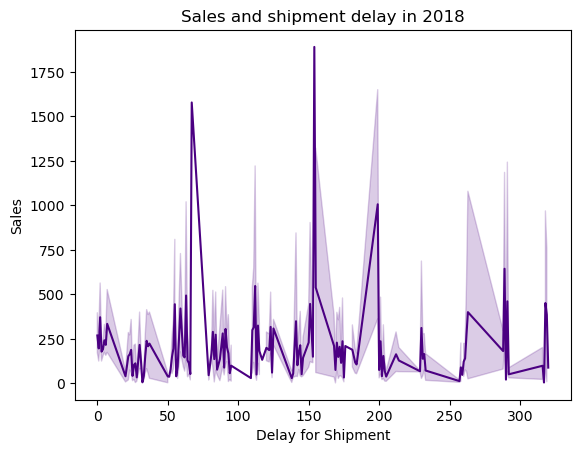

In [20]:
plt.title('Sales and shipment delay in 2018')
sns.lineplot(data = data_2018_sales , x = 'ShipmentDelay' , y ='Sales' , color ='indigo')
plt.xlabel('Delay for Shipment')
plt.show()

##### <center> Shipment delay was highest for sales in range 250-500

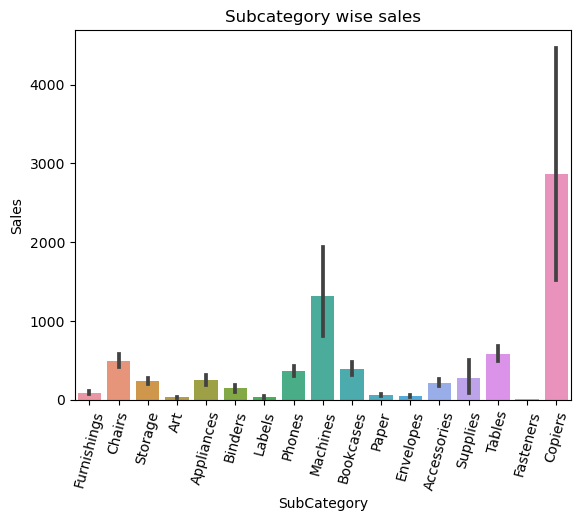

In [21]:
sns.barplot(data= data_2018_sales , x ='SubCategory', y ='Sales' )
plt.xticks( rotation = 75)
plt.title('Subcategory wise sales')
plt.show()

In [22]:
salesin_2018 =  data.query("OrderYear == 2018")

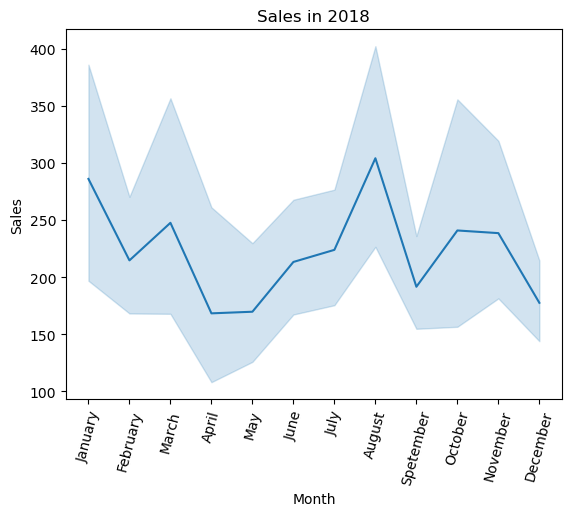

In [23]:
plt.title('Sales in 2018')
sns.lineplot(data = salesin_2018 , x = 'Month' , y='Sales'  )
plt.xticks( rotation =75)
plt.show()

#####  Sales were highest in the month of August in the year 2018

In [24]:
salesin_2017 = data.query(" OrderYear ==2017 & Month == 'January'")

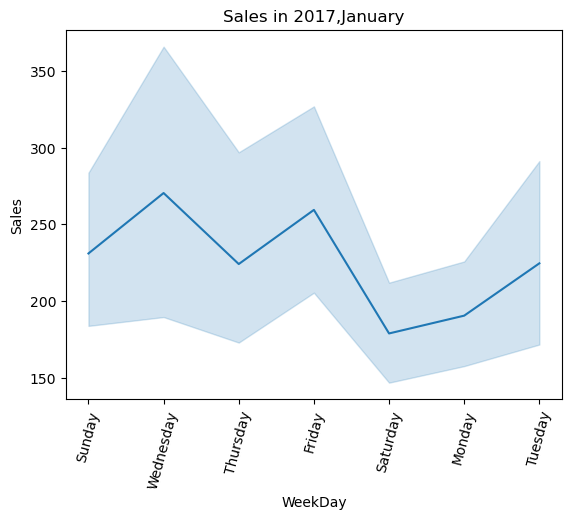

In [25]:
plt.title('Sales in 2017,January')
sns.lineplot(data = salesin_2018 , x = 'WeekDay' , y='Sales'  )
plt.xticks( rotation =75)
plt.show()

##### Sales were highest in wednesdays in January , 2017

In [26]:
sales_dec_2018 = data.query(" OrderYear==2018 & Month == 'December' ")

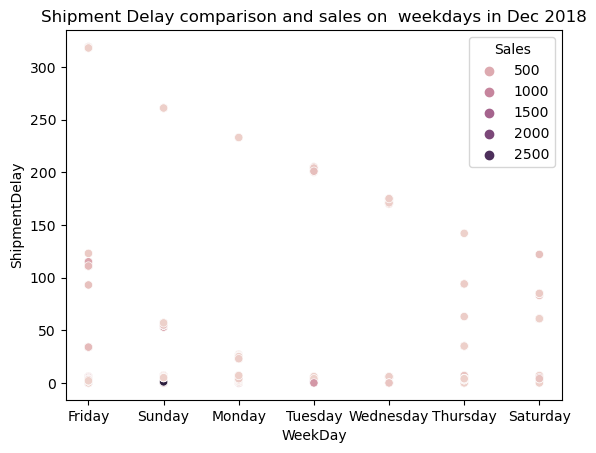

In [27]:

sns.scatterplot( data = sales_dec_2018 ,x  = 'WeekDay' ,  y ='ShipmentDelay', hue = 'Sales')
plt.title('Shipment Delay comparison and sales on  weekdays in Dec 2018')
plt.show()

##### <center> Shipement Delay occured most in Fridays in the month of december 2018 and Sales were high only on fridays



###### States with Highest number of orders

In [28]:
data.State.value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada        

In [29]:
def location_wise(Location):
    sort_location = data[data.State == Location]
    sort_location.drop(columns= 'State' , inplace=True)
    return sort_location

In [30]:
Texas_data = location_wise('Texas')
California_data = location_wise('California')
NewYork_data = location_wise('New York')
Pennsylvania_data =location_wise( 'Pennsylvania')

##### Shipment Delay in States with maximum number of orders

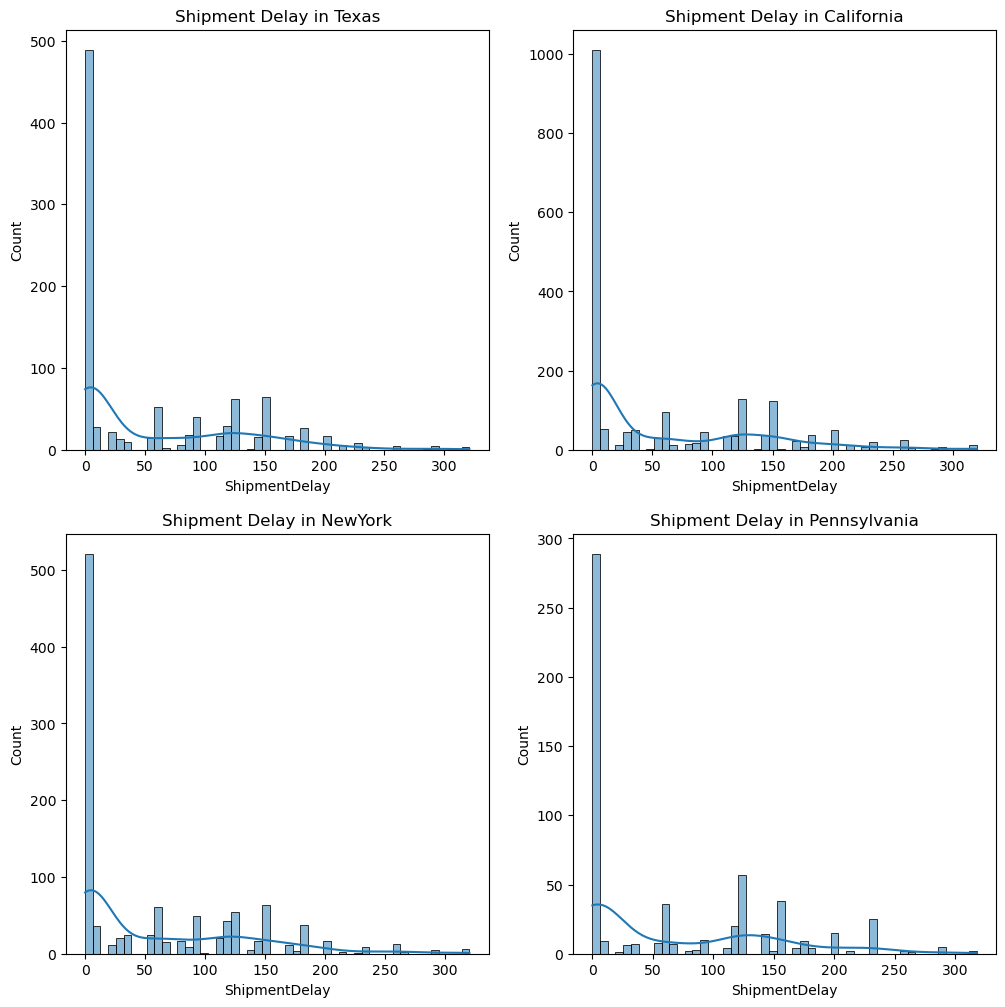

In [31]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot( data = Texas_data , x ='ShipmentDelay' , bins =50, kde = True)
plt.title( 'Shipment Delay in Texas')


plt.subplot(2,2,2)
sns.histplot( data = California_data , x ='ShipmentDelay' , bins =50, kde = True)
plt.title('Shipment Delay in California')


plt.subplot(2,2,3)
sns.histplot( data = NewYork_data , x ='ShipmentDelay' , bins =50, kde = True)
plt.title('Shipment Delay in NewYork')


plt.subplot(2,2,4)
sns.histplot( data = Pennsylvania_data , x ='ShipmentDelay' , bins =50, kde = True)
plt.title('Shipment Delay in Pennsylvania')

plt.show()


##### <center> Shipment delay is highest in California among the states with maximum orders

##### Number of orders delivered on same day without any delay

In [32]:
ShipmentDelay_zero = data.query("ShipmentDelay == 0")
ShipmentDelay_zero.ShipmentDelay.value_counts()

0    514
Name: ShipmentDelay, dtype: int64

###### <center> There are 514 orders delivered without any delay

In [33]:
ShipmentDelay_states = data.sort_values(by ='ShipmentDelay', ascending =True)
ShipmentDelay_states.drop(columns = ['OrderDate','ShipDate', 'Region'], inplace=True )
ShipmentDelay_states.head(10)

,ShipMode,CustomerID,Segment,State,Category,SubCategory,Sales,OrderYear,WeekDay,Month,ShipmentDelay
5914,Same Day,MK-17905,Corporate,Connecticut,Furniture,Bookcases,1043.920,2017,Friday,October,0
5850,Same Day,MH-17455,Consumer,Indiana,Furniture,Chairs,1424.900,2017,Wednesday,October,0
1699,Same Day,DH-13675,Home Office,California,Furniture,Bookcases,411.332,2015,Friday,November,0
4173,Same Day,CC-12475,Consumer,New York,Office Supplies,Binders,45.576,2017,Saturday,February,0
8995,Same Day,PT-19090,Consumer,Florida,Office Supplies,Storage,4.768,2018,Friday,October,0
7956,Same Day,SG-20470,Consumer,New York,Furniture,Tables,1044.630,2018,Friday,June,0
8430,Same Day,BP-11185,Corporate,Pennsylvania,Technology,Accessories,1119.888,2018,Sunday,August,0
2252,Same Day,DC-13285,Consumer,Florida,Technology,Accessories,447.944,2016,Monday,March,0
2243,Same Day,DC-13285,Consumer,Florida,Office Supplies,Storage,150.408,2016,Monday,March,0
4417,Same Day,VM-21835,Consumer,Delaware,Office Supplies,Binders,32.540,2017,Thursday,March,0


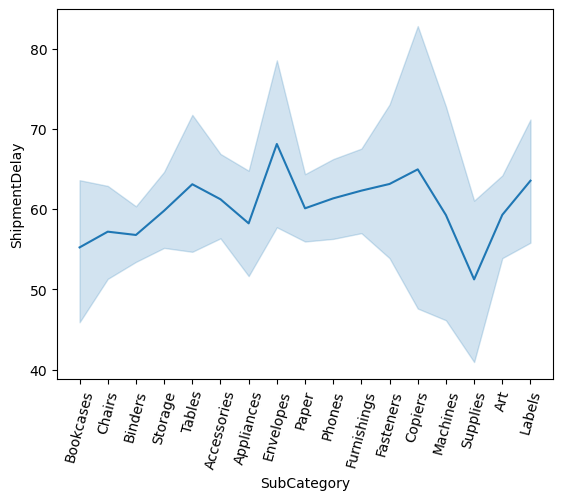

In [34]:
sns.lineplot( data = ShipmentDelay_states , x= 'SubCategory' , y = 'ShipmentDelay' )
plt.xticks( rotation = 75)
plt.show()

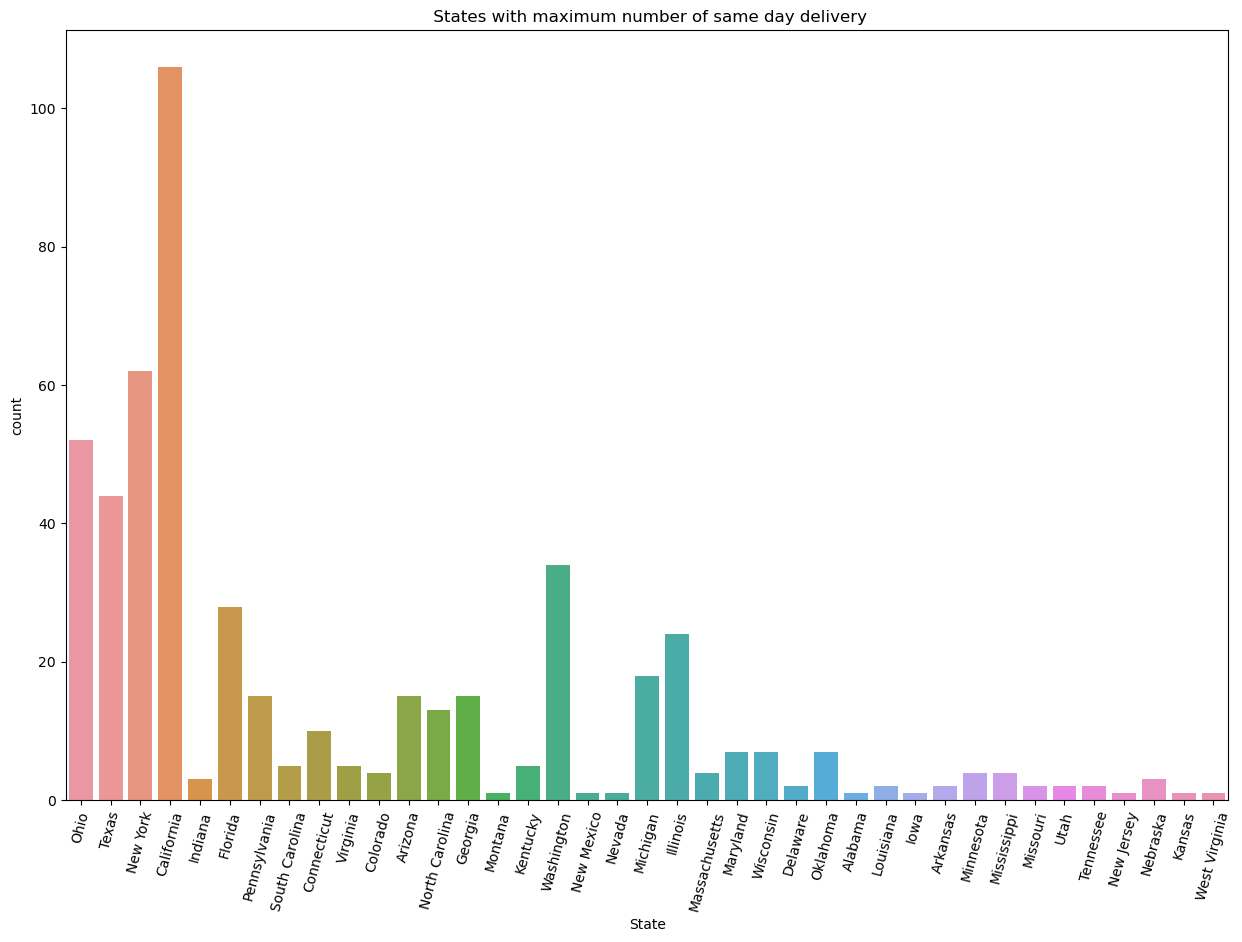

In [35]:
plt.figure(figsize = (15,10))
sns.countplot( data = ShipmentDelay_zero,  x= 'State' )
plt.title(' States with maximum number of same day delivery')
plt.xticks( rotation =75)
plt.show()

##### Most number of same day delivery was in California

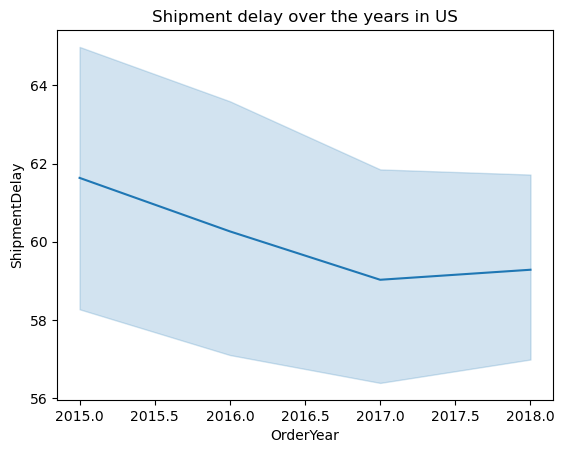

In [36]:
sns.lineplot( data = data , x = 'OrderYear' ,  y = 'ShipmentDelay')
plt.title( 'Shipment delay over the years in US')
plt.show()

##### <center>Shipment Delay was highest in the year 2015 and least in 2017

In [37]:
data.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [38]:
palette_color = sns.color_palette ('spring_r')

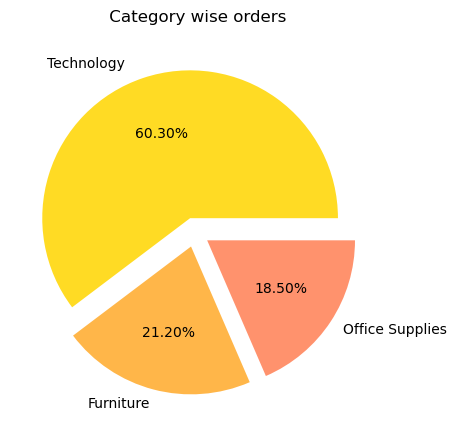

In [39]:
plt.title( ' Category wise orders' "\n", )
plt.pie(data=data,x=data.Category.value_counts(),\
explode = [0.1, 0.1, 0.1], \
colors=palette_color,\
labels=['Technology   ','Furniture' ,'Office Supplies' ],\
autopct='%0.2f%%');


##### <Center>Technology goods are purchased most

In [40]:
data.columns

Index(['OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'Segment', 'State',
       'Region', 'Category', 'SubCategory', 'Sales', 'OrderYear', 'WeekDay',
       'Month', 'ShipmentDelay'],
      dtype='object')

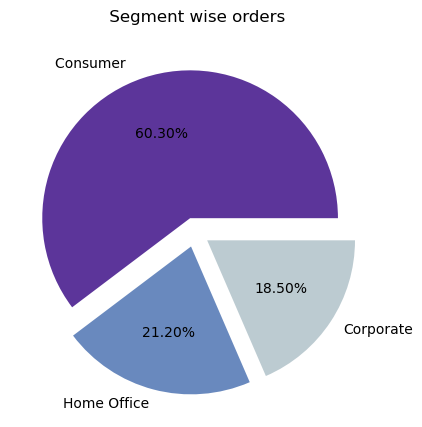

In [41]:
palette_color1 = sns.color_palette('twilight_shifted')
plt.title( ' Segment wise orders' "\n", )
plt.pie(data=data,x=data.Category.value_counts(),\
explode = [0.1, 0.1, 0.1], \
colors=palette_color1,\
labels=['Consumer   ','Home Office' ,'Corporate' ],\
autopct='%0.2f%%');

###### <center>Highest number of orders are placed by Customers and least by Corporate

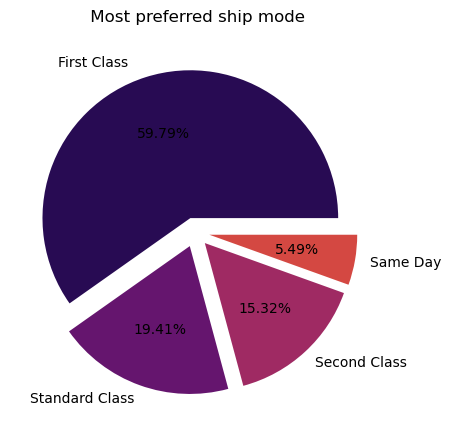

In [42]:
palette_color = sns.color_palette('inferno')
plt.title( ' Most preferred ship mode' "\n", )
plt.pie(data=data,x=data.ShipMode.value_counts(),\
explode = [0.1, 0.1, 0.1,0.1], \
colors=palette_color,\
labels=['First Class   ','Standard Class' ,'Second Class', 'Same Day' ],\
autopct='%0.2f%%');

##### <center>First class is the most preferred Shipping Mode

##### Comparison of Sales in 2017 and 2018

In [43]:
Year_sales_2017 = data[data.OrderYear == 2017]
Year_sales_2018 = data[data.OrderYear == 2018]

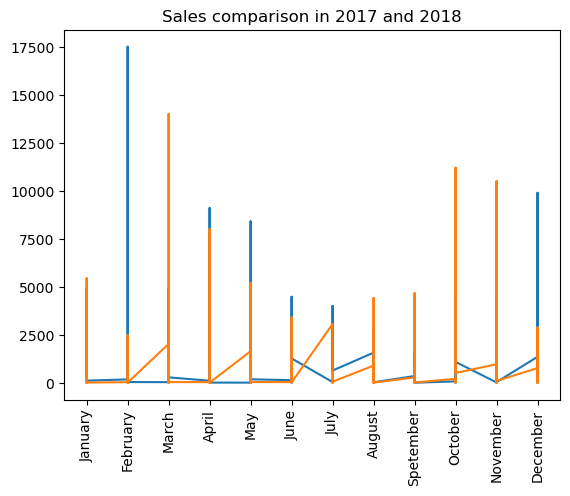

In [44]:

plt.plot('Month', 'Sales', data=Year_sales_2017 )
plt.xticks(rotation = 90)
plt.plot('Month', 'Sales', data=Year_sales_2018 )
plt.xticks(rotation = 90)
plt.title('Sales comparison in 2017 and 2018')
plt.show()

##### Sales were highest in 2017 February and 2018 March 2018 ,but overall sales were less in 2018 compared to 2017

In [45]:
officesupply_2018 = data.query("Category == 'Office Supplies' & OrderYear ==2018 ")
Furniture_2018 = data.query( "Category == 'Furniture'&  OrderYear == 2018")
Technology_2018 = data.query ("Category =='Technology' & OrderYear ==2018 ")


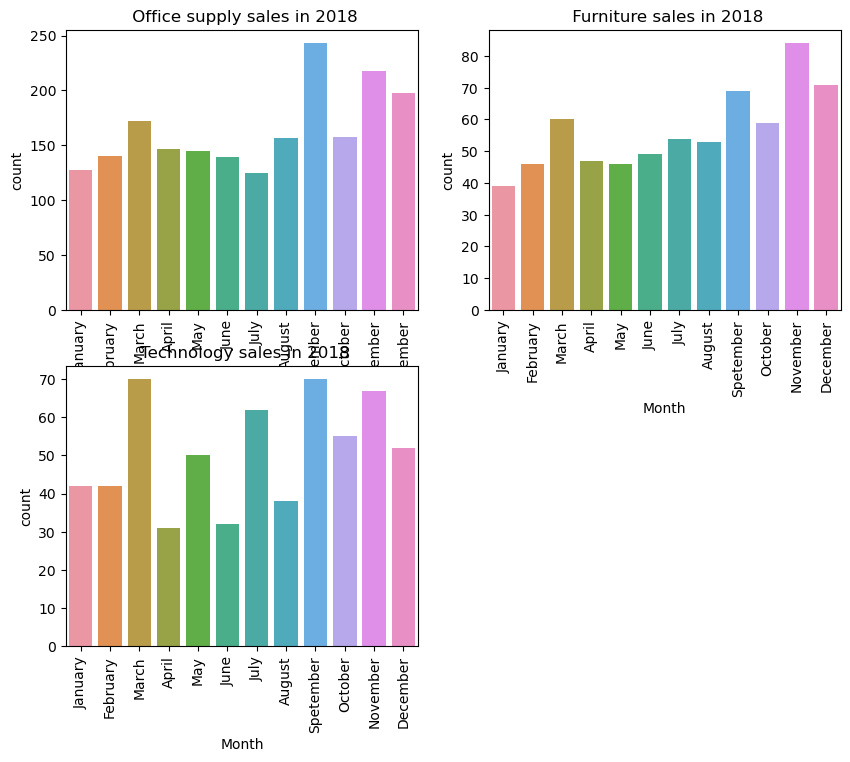

In [46]:
plt.figure( figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot( data = officesupply_2018 ,  x = 'Month')
plt.title( ' Office supply sales in 2018')
plt.xticks( rotation = 90)

plt.subplot(2,2,2)
sns.countplot( data = Furniture_2018 ,  x = 'Month')
plt.title( ' Furniture sales in 2018')
plt.xticks( rotation = 90)

plt.subplot(2,2,3)
sns.countplot( data = Technology_2018 ,  x = 'Month')
plt.title( ' Technology sales in 2018')
plt.xticks( rotation = 90)
plt.show()

###### Sales of Office supplies were highest in September and least in July
###### Sales of Furniture goods were highest in November and least in January
###### Sales of Technology goods were highest in  March and September and least  in April

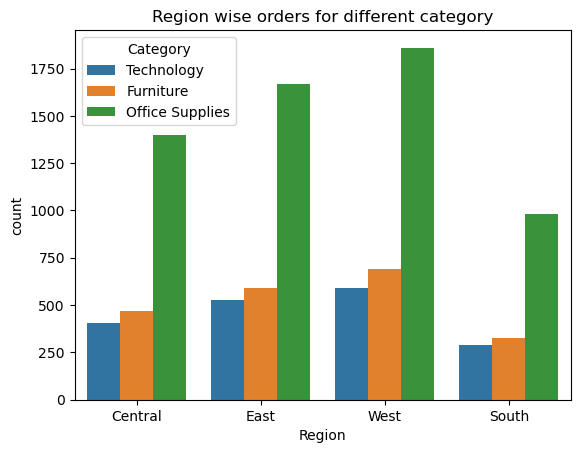

In [47]:
sns.countplot( data = data , x ='Region' ,hue ='Category')
plt.title('Region wise orders for different category')
plt.show()

###### Office Supplies and Technology goods and Furniture were sold most in west region of US



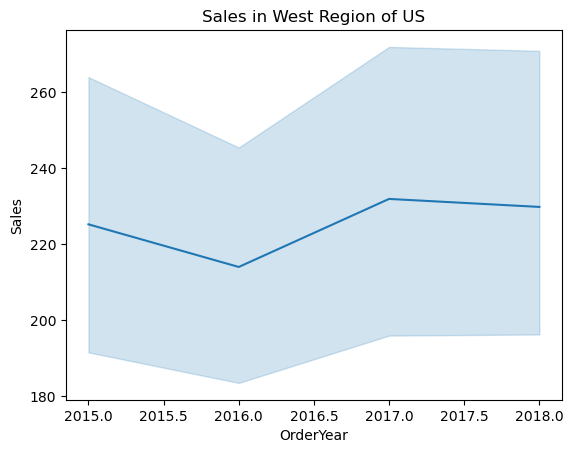

In [48]:
West_sales = data[data.Region == 'West']
sns.lineplot(data = West_sales , x ='OrderYear' , y = 'Sales')
plt.title('Sales in West Region of US')
plt.show()

##### <center> Sales in West region showed a slight increase after 2017

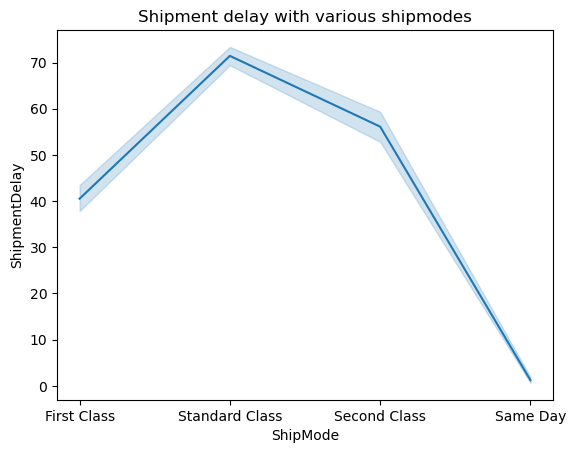

In [49]:
sns.lineplot ( data = data , x= 'ShipMode' , y ='ShipmentDelay')
plt.title('Shipment delay with various shipmodes')
plt.show()

###### <center>Shipment delay is highest while using  First class Shipmode

###### Most Ordered item in Subcategory

In [50]:
subcat_sales = data.groupby(['SubCategory'])['ShipmentDelay'].count()
subcat_sales

SubCategory
Accessories     756
Appliances      459
Art             785
Binders        1492
Bookcases       226
Chairs          607
Copiers          66
Envelopes       248
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1338
Phones          876
Storage         832
Supplies        184
Tables          314
Name: ShipmentDelay, dtype: int64

In [51]:
Furniture2017 = data.query(" Category ==  'Furniture' & OrderYear == 2017")


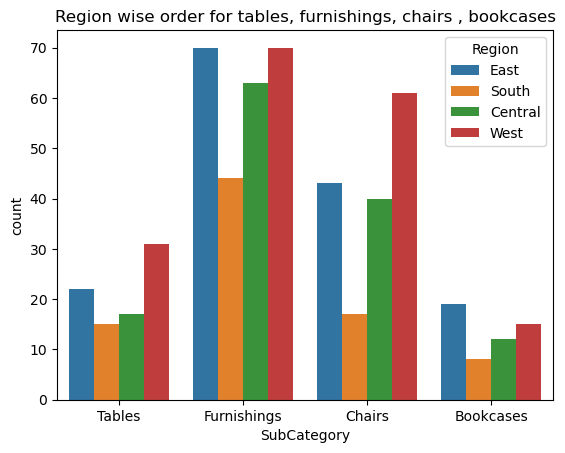

In [52]:
sns.countplot(data =Furniture2017 , x = 'SubCategory' , hue ='Region')
plt.title('Region wise order for tables, furnishings, chairs , bookcases')
plt.show()

<b><center>Furnishings were most sold in west and east
<b><center>Bookcases were most sold in east and least sold in South

In [55]:
data_2016 = data.query(" OrderYear == 2016 ")
data_2017 = data.query(" OrderYear == 2017")

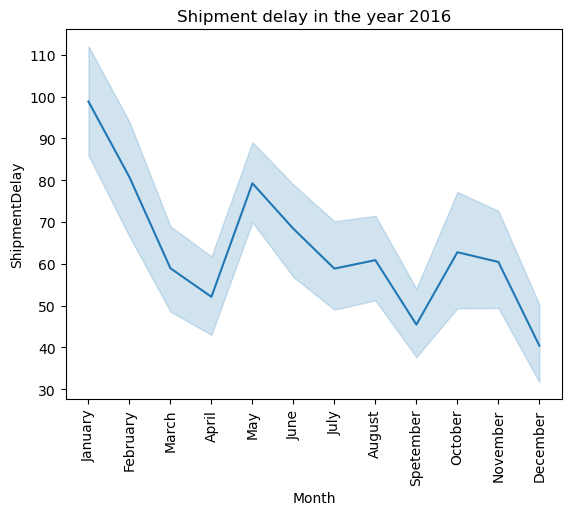

In [54]:
sns.lineplot( data =data_2016 , x = 'Month' , y ='ShipmentDelay')
plt.xticks(rotation = 90)
plt.title('Shipment delay in the year 2016')
plt.show()

<b><center> Shipment delay was highest in the month of February

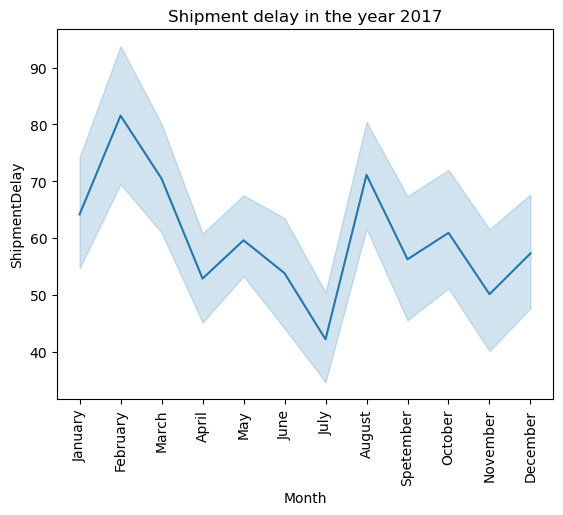

In [56]:
sns.lineplot( data =data_2017 , x = 'Month' , y ='ShipmentDelay')
plt.xticks(rotation = 90)
plt.title('Shipment delay in the year 2017')
plt.show()

<b><center> Shipment delay was highest in the month of February

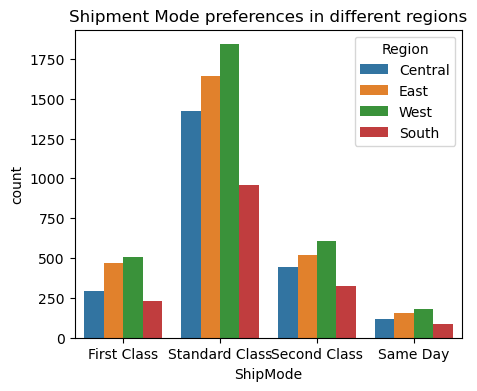

In [62]:
plt.figure(figsize= (5,4))
sns.countplot( data = data , x = 'ShipMode' , hue ='Region')
plt.title('Shipment Mode preferences in different regions')
plt.show()

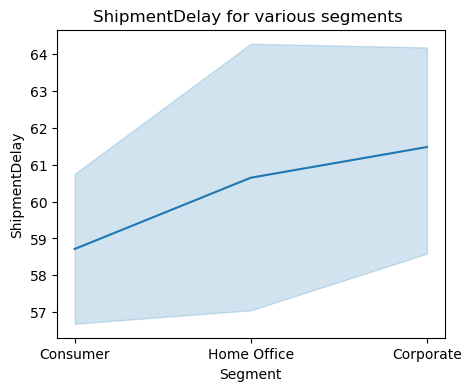

In [65]:
plt.figure(figsize= (5,4))
sns.lineplot(data= data , x ='Segment', y= 'ShipmentDelay')
plt.title('ShipmentDelay for various segments ')
plt.show()